# Survival models: Accelerated failure time (AFT)

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from lifelines import WeibullAFTFitter
from lifelines.datasets import load_rossi

Humans live approximately 7 times more than average dogs

![](img/dog_age.jpg)

$ \large S_a(t) = S_b(\frac{t}{\lambda}) $ 

$ \large \lambda(x) = \exp(\beta_0 + \sum_{x=1}^n \beta_i x_i) $ 

Similar to proportional hazzards model with the probability but here with the time: a unit increase in $x_i$ means the average/median survival *time* changes by a factor of $exp(\beta_i)$.

### Weilbull distribution

 ![](img/failure_rate.png)

Hazzards function

$ \large h(t) = \Big( \frac{t}{\lambda(x)} \Big)^\rho $

In [2]:
df = load_rossi()
df.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [5]:
aft = WeibullAFTFitter()
aft.fit(df, duration_col='week', event_col='arrest')

aft.print_summary(3) 

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
           log-likelihood = -679.917
         time fit was run = 2020-08-06 17:43:49 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ age        0.041      1.042      0.016            0.009            0.072                1.009                1.075
        fin        0.272      1.313      0.138            0.002            0.543                1.002                1.720
        mar        0.311      1.365      0.273           -0.224            0.847                0.799                2.332
        paro       0.059      1.061      0.140           -0.215            0.333                0.807                1.394
        prio      -0.066      0.936      0.021           -0.107           -0.025                0.899                0.976
        race      -0.225      0.799      0.220           -0.656            0.207                0.519                1.230
        wexp       0.107      1.112      0.152           -0.190            0.404                0.827                1.497
        Intercept  3.990     54.062      0.419            3.169            4.812               23.777              122.921
rho_    Intercept  0.339      1.404      0.089            0.165            0.514                1.179                1.671
                       z       p   -log2(p)
param   covariate                          
lambda_ age        2.544   0.011      6.512
        fin        1.973   0.049      4.365
        mar        1.139   0.255      1.973
        paro       0.421   0.674      0.570
        prio      -3.143   0.002      9.224
        race      -1.021   0.307      1.703
        wexp       0.703   0.482      1.053
        Intercept  9.521 <0.0005     68.978
rho_    Intercept  3.809 <0.0005     12.807
---
Concordance = 0.640
AIC = 1377.833
log-likelihood ratio test = 33.416 on 7 df
-log2(p) of ll-ratio test = 15.462

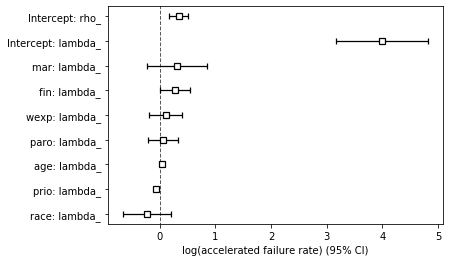

In [7]:
aft.plot();

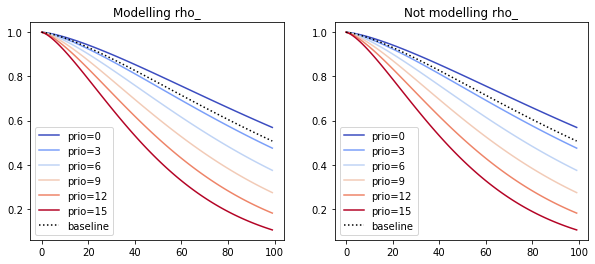

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

times = np.arange(0, 100)
wft_model_rho = WeibullAFTFitter().fit(df, 'week', 'arrest', timeline=times)
wft_model_rho.plot_partial_effects_on_outcome('prio', range(0, 16, 3), cmap='coolwarm', ax=ax[0])
ax[0].set_title("Modelling rho_")

wft_not_model_rho = WeibullAFTFitter().fit(df, 'week', 'arrest', timeline=times)
wft_not_model_rho.plot_partial_effects_on_outcome('prio', range(0, 16, 3), cmap='coolwarm', ax=ax[1])
ax[1].set_title("Not modelling rho_");

## Credits & Links

https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html?highlight=aft#the-weibull-aft-model